# Pruebas  de Hipótesis

Nos enfocaremos en pruebas que nos permitan diseñar una regla de decisión, que nos conduzca a aceptar o rechazar alguna información sobre la población.

## **Definición**
La hipótesis nula denotada por $H_0$, es la pretensión de que inicialmente se supone
cierta (la pretensión de “creencia previa”). La hipótesis alternativa denotada por $H_1$,
es la aseveración contradictoria a $H_0$.
La hipótesis nula será rechazada en favor de la hipótesis alternativa sólo si la
evidencia muestral sugiere que $H_0$ es falsa. Si la muestra no contradice fuertemente
a $H_0$, se continuará creyendo en la verdad de la hipótesis nula. Las dos posibles
conclusiones derivadas de un análisis de prueba de hipótesis son entonces rechazar
$H_0$ o no rechazar $H_0$.

Un procedimiento de prueba se especifica como sigue:
1. Un estadístico de prueba, una función de los datos muestrales en los cuales ha de
basarse la decisión (rechazar $H_0$ o no rechazar $H_0$)
2. Una región de rechazo, el conjunto de todos los valores estadísticos de prueba por
los cuales $H_0$ será rechazada.
La hipótesis nula será rechazada entonces si y sólo si el valor estadístico de prueba
observado o calculado queda en la región de rechazo.

3. El estadístico de prueba, lo definimos con los datos muestrales del experimento.

In [ ]:
# Si la evidencia muestral no contradice a la H_0, entonces está se considera como cierta
# Si la evidencia muestral contradice a H_0, entonces consideramos como cierta a H_1

# Tipos de Pruebas de hipótesis.

1. **Prueba de hipótesis bilateral (o prueba de hipótesi de dos colas)**

La hipótesis alternativa de la prueba de hipótesis afirma que el parámetro poblacional es «diferente $\mu_0$» un valor concreto.

Es decir

$$
H_0: \mu= \mu_0\qquad H_1:\mu \neq \mu_0
$$

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Datos
alph=0.05
x=np.linspace(-4,4,1000)
y=ss.norm(0,1).pdf(x)

In [ ]:
#Región crítica
x_rechazo=np.linspace(-4,ss.norm(0,1).ppf(alph/2),100)
y_rechazo=ss.norm(0,1).pdf(x_rechazo)

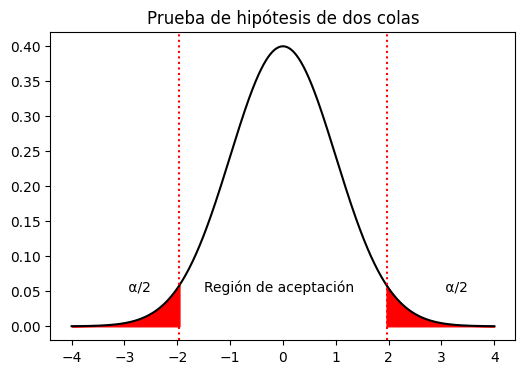

In [ ]:
fig=plt.figure(figsize=(6,4))
plt.plot(x,y,color='black')
plt.axvline(ss.norm(0,1).ppf(alph/2),linestyle=':',color='red')
plt.axvline(ss.norm(0,1).ppf(1-alph/2),linestyle=':',color='red')
plt.fill_between(x_rechazo,y_rechazo,color='red')
plt.fill_between(-x_rechazo,y_rechazo,color='red')
plt.text (-3, 0.05, ' α/2')
plt.text (3, 0.05, ' α/2')
plt.text (-1.5, 0.05, 'Región de aceptación')
plt.title('Prueba de hipótesis de dos colas')
plt.show()

In [ ]:
# Si el estadístico de prueba (que no hemos definido) cae en la región en rojo--- > Rechazamos H_0 (aceptar H_1)
# Si el estadístico de prueba cae en la zona de aceptación---> Aceptamos H_0
# (Todo esto, para una prueba de dos colas)

2. **Prueba de hipótesis unilateral (o prueba de hipótesis de una cola)**

 La hipótesis alternativa de la prueba de hipótesis afirma que el parámetro poblacional es **mayor que** (cola derecha $H_1:\mu > \mu_0$) o **menor que** ($H_1: \mu<\mu_0$ cola izquierda).

$$
H_0: \mu=\mu_0\qquad H_1: \mu>\mu_0
$$
(Prueba de cola superior)

$$
H_0: \mu=\mu_0\qquad H_1: \mu<\mu_0
$$
(Prueba de cola inferior)

In [ ]:
#Región crítica
x_rechazo1=np.linspace(-4,ss.norm(0,1).ppf(alph),100)
y_rechazo1=ss.norm(0,1).pdf(x_rechazo1)

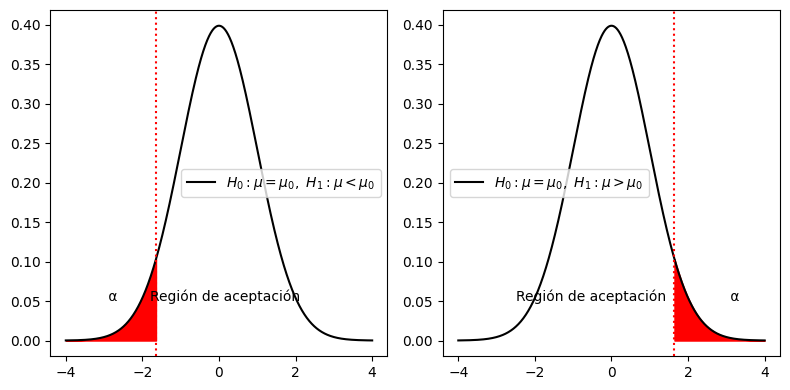

In [ ]:
#Gráfica prueba de Hipotesis de una cola
fig,axs=plt.subplots(1,2,figsize=(8,4))
#figura 1
axs[0].plot(x,y,color='black',label=f'$H_0: \mu=\mu_0, \,\, H_1: \mu<\mu_0$')
axs[0].axvline(ss.norm(0,1).ppf(alph),linestyle=':',color='red')
axs[0].fill_between(x_rechazo1,y_rechazo1,color='red')
axs[0].text (-3, 0.05, ' α')
axs[0].text (-1.8, 0.05, 'Región de aceptación')
axs[0].legend()

#figura 2
axs[1].plot(x,y,color='black',label=f'$H_0: \mu=\mu_0, \,\, H_1: \mu>\mu_0$')
axs[1].axvline(ss.norm(0,1).ppf(1-alph),linestyle=':',color='red')
#plt.axvline(ss.norm(0,1).ppf(alph/2),linestyle=':',color='red')
#plt.fill_between(x_rechazo,y_rechazo,color='red')
axs[1].fill_between(-x_rechazo1,y_rechazo1,color='red')
#plt.text (-3, 0.05, ' α/2')
axs[1].text (3, 0.05, ' α')
axs[1].text (-2.5, 0.05, 'Región de aceptación')
axs[1].legend()

plt.tight_layout()
plt.show()

### Definición: (Valor $P$)

El $P$ valor es el nivel de significancia más bajo que llevaría al rechazo de $H_0$ con los datos dados.

Cuando se conocer el valor $P$ el responsable de tomar decisiones puede determinar por sí mismo qué tan significativos son los datos, sin que el analista imponga una significancia. ($\alpha=5\%$)

Para una distribución normal, el valor $P$ se define como

\begin{align*}
P=\left\{ \begin{array}{rcl} 2(1-\Theta(|z_0|)) &  & \mathrm{prueba\,dos\,colas} \\ 1-\Theta(z_0) &  & \mathrm{prueba\,una\,cola\,superior} \\\Theta(z_0) &  & \mathrm{prueba\,una\,cola\,inferior} \end{array} \right.
\end{align*}

con $\Theta(z)=P(Z\leq z)$ donde $Z\sim N(0,1)$.


**Observación**:

1. Si $p_{valor}>\alpha$, se acepta $H_0$
2. Si $p_{valor}<\alpha$, se rechaza $H_0$



In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

**Ejemplo:**


Una fábrica afirma que el peso promedio de sus barras de chocolate es de 100 gramos. Un inspector de calidad sospecha que no es así y toma una muestra aleatoria de 5 barras, cuyos pesos (en gramos) son:

$$[98, 101, 97, 100, 96]$$

Considerando que la prueba de hipótesis
$$
H_0 :\mu=100 \qquad H_1:\mu\neq 100$$

Calcular el $p_{valor}$


In [ ]:
# Ingresar datos
datos=pd.DataFrame([98,101,97,100,96])

In [ ]:
# Extraer datos muestrales
media,std=datos.mean(),datos.std()

Sol:

En este caso, tenemos una prueba de hipótesis de dos colas y
$$
p_{valor}=2(1-\Theta(|z_0|))
$$

In [ ]:
# P-valor
p_valor=2*(1-ss.norm(media,std).cdf(100))

**Observación**:

1. Si $p_{valor}>\alpha$, se acepta $H_0$
2. Si $p_{valor}<\alpha$, se rechaza $H_0$



In [ ]:
significancia=0.05
if p_valor<significancia:
  print('Rechazar H_0, el peso promedio de los chocolates es distinto a 100 grs')
else:
  print('Aceptamos H_0: el peso promedio de los chocolates es 100 grs')

Aceptamos H_0: el peso promedio de los chocolates es 100 grs


**Ejemplo 2:**

Un fabricante afirma que sus pilas duran al menos 10 horas en uso continuo. Un técnico sospecha que las pilas duran menos de lo que se promete. Para verificarlo, prueba una muestra de 8 pilas, y mide estas duraciones en horas:
$$
[9.5, 9.8, 10.1, 9.6, 9.3, 9.7, 9.4, 9.9]
$$

Calcular el p_valor de esta prueba, considerando que:
$$
H_0: 𝜇\geq10 \qquad
H_1: 𝜇<10
$$


In [ ]:
datos1=pd.DataFrame([9.5,9.8,10.1,9.6,9.3,9.7,9.4,9.9])

In [ ]:
#datos muestrales
media1,std1=datos1.mean(),datos.std()

$$
p_{valor}=\Theta(z_0)
$$

In [ ]:
p_valor1=ss.norm(media1,std1).cdf(10)

In [ ]:
significancia=0.05
if p_valor<significancia:
  print('Rechazar H_0, la duración media de las pilas es inferior a 10 horas')
else:
  print('Aceptamos H_0: la duración media de las pilas es superior a 10 horas')

Aceptamos H_0: la duración media de las pilas es superior a 10 horas


### Definición (Error tipo I)

El **error tipo I** se conoce como el rechazo de la hipótesis nula $H_0$ cuando esta es verdadera


Observación:

La probabilidad de error tipo I, se conoce como el nivel de significación $\alpha$

### Definición (Error tipo II)
El **error tipo II** se define como la aceptación de la hipótesis nula, cuando está es falsa


Observación:

Al evaluar un procedimiento de prueba de hipótesis, también es importante examinar la probabilidad de un error tipo II, la cual se denota como $\beta$. Es decir

$$
\beta=P(error\,\,tipo\,\,II)
$$


**Ejemplo**

Un fabricante de telas considera que la proporción de pedidos de materia prima que
llegan con retraso es $p = 0.6$. Si una muestra aleatoria de 10 pedidos indica que 3 o
menos llegaron con retraso, la hipótesis de que $p = 0.6$ se debería rechazar a favor
de la alternativa $p < 0.6$. Utilice la distribución binomial.

1.  Calcule la probabilidad de cometer un error tipo $I$ si la proporción verdadera es $p = 0.6$.
2. Calcule la de cometer un error tipo $II$ para las alternativas $p = 0.3$ y $p=0.5$

Sol:
$$
H_0: P(X\leq 3),\qquad H_1:P(X>3)
$$

Donde X: pedidos que llegan con retraso
$$
X\sim binom(10,0.6)
$$

In [ ]:
# Error tipo 1
ss.binom.cdf(3,10,0.6)

np.float64(0.05476188160000002)

In [ ]:
# Error tipo II
1-ss.binom.cdf(4,10,0.3)

np.float64(0.15026833259999994)

# Pruebas de hipótesis sobre $\mu$ (con varianza $\sigma^2$ desconocida)

##1. **$\sigma$ desconocida y las muestras pequeñas $(n<30)$**

Si
$\left\{X_1, X_2 . . . , X_n\right\}$ es una muestra aleatoria de una distribución normal, la variable estandarizada
$$
t_0=\frac{\bar{X}-\mu_0}{S/\sqrt{n}}
$$
tiene una distribución $t$ de Student con $n-1$ grados de libertad.

Luego, tenemos los siguientes resultados:

1. $H_0: \mu=\mu_0$, versus $H_1 : \mu\neq \mu_0$ (Prueba de dos colas).

En este caso, se acepta como válida $H_0$ si y sólo si
$$
t_0 \in [-t_{1-\alpha/2,n-1},t_{1-\alpha/2,n-1}]
$$

2. $H_0: \mu=\mu_0$, versus $H_1 : \mu> \mu_0$ (Prueba de la cola superior).

En este caso, se acepta como válida $H_0$ si y sólo si
$$
t_0 \leq t_{1-\alpha,n-1}
$$

3. $H_0: \mu=\mu_0$, versus $H_1 : \mu <\mu_0$ (Prueba de la cola inferior).

En este caso, se acepta como válida $H_0$ si y sólo si
$$
 -t_{1-\alpha,n-1}\leq t_0
$$

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import random
import math

**Ejemplo:**

Una joyería afirma que el peso promedio en quilates de los diamantes clasificados como "ideal" es de al menos 1.2 quilates. Para verificar esta afirmación, se toma una muestra aleatoria de 20 diamantes del tipo ideal, obtenidos de la base de datos diamonds de la librería seaborn.



In [ ]:
diamantes=sns.load_dataset('diamonds')

In [ ]:
diamante_ideal=diamantes[diamantes['cut']=='Ideal']# diamantes de tipo ideal

In [ ]:
# consideraremos una muestra aleatoria de 20 observaciones del peso de los diamantes ideal
muestra=np.random.choice(diamante_ideal['carat'],size=20)

1.  Determinar si hay suficiente evidencia para rechazar la afirmación de la joyería y concluir que el peso promedio de los diamantes de al menos a 1.2 quilates.

Sol:

En este caso
$$
H_0: \mu \geq 1.2\qquad H_1:\mu< 1.2
$$
(prueba de cola inferior)

1. Definimos el estadístico de prueba
$$
t_0=\frac{\bar{X}-\mu_0}{S/\sqrt{n}}
$$

In [ ]:
# extraer datos muestrales
media,std=muestra.mean(),muestra.std()

In [ ]:
# Definir el estadístico de prueba
t_0=(media-1.2)/(std/math.sqrt(20))

In [ ]:
print(f'El estadístico de prueba es :{round(t_0,2)}')

El estadístico de prueba es :-2.85


2. Determinamos la zona de aceptación/Rechazo

  En este caso, se acepta como válida $H_0$ si y sólo si
$$
 -t_{1-\alpha,n-1}\leq t_0
$$

In [ ]:
significancia=0.05
t_critico=-ss.t.ppf(1-significancia,19)

3. Realizar la prueba de hipótesis

In [ ]:
if t_0>=t_critico:
  print('Aceptamos H_0: El peso promedio de los diamantes es  al menos 1.2 quilates')
else:
  print('Aceptamos H_1: El peso promedio de los diamantes es inferior a 1.2 kilates')

Aceptamos H_1: El peso promedio de los diamantes es inferior a 1.2 kilates


**Opción b**

In [ ]:
pip install pingouin # Cada vez que utilicemos colab, tenemos que instalar pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.5 MB/s eta 0:00:00


In [ ]:
import pingouin as pg

$$
H_0: \mu \geq 1.2\qquad H_1:\mu< 1.2
$$

In [ ]:
tabla=pg.ttest(muestra,1.2,alternative='less')
# Si tenemos una prueba de cola superior pg.ttest(muestra, u_0,alternative='greater)
# Si tenemos una prueba de dos colas pg.ttest(muestra,u_0,alternative='two-sided)

In [ ]:
p_valor=tabla['p-val'].iloc[0]

if p_valor>=significancia:
  print('H_0 es verdadera')
else:
  print('H_1 es verdadera: El peso promedio de los diamantes es inferior a 1.2 quilates')

H_1 es verdadera: El peso promedio de los diamantes es inferior a 1.2 quilates


2. (**Prueba de dos colas:**) El mismo vendedor asegura que el precio promedio de los diamantes de este tipo es de $\$5000$ dólares. Para verificar esta información, extrae una muestra de 100 observaciones.Con un nivel de significancia del $5\%$ ¿se puede afirmar que el precio promedio es diferente a $\$5000$ dólares?

**solución:**
$$
H_0 : \mu=5000,\qquad H_1:\mu\neq5000
$$

In [ ]:
muestra1=np.random.choice(diamante_ideal['price'],size=100)

In [ ]:
# Prueba de hipótesis
tabla1=pg.ttest(muestra1,5000,alternative='two-sided')
tabla1

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.452674,99,two-sided,0.000022,"[2440.22, 4018.36]",0.445267,743.53,0.99284


In [ ]:
p_valor1=tabla1['p-val'].iloc[0]
if p_valor1>= significancia:
  print('Se cumple H_0: El precio promedio de los diamantes ideal es 5000 dólares')
else:
  print('Se cumple H_1: El precio promedio de los diamantes ideal es distinto a 5000 dólares')

Se cumple H_1: El precio promedio de los diamantes ideal es distinto a 5000 dólares


**Gráfica**

$$
t_0 \in [-t_{1-\alpha/2,n-1},t_{1-\alpha/2,n-1}]
$$

In [ ]:
estadistico=tabla1['T'].iloc[0]
t_crit=ss.t.ppf(1-significancia/2,99)

In [ ]:
x_t=np.arange(-5,5,0.001) # Particion sobre el eje X
y_t=ss.t.pdf(x_t,99) # función de densidad de probabilidad, para la distribución t

In [ ]:
# P(X<=a)
# P(X=a)
#

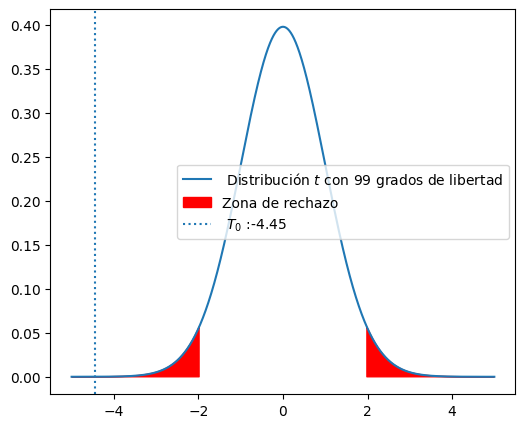

In [ ]:
figure=plt.figure(figsize=(6,5))
plt.plot(x_t,y_t,label=f' Distribución $t$ con {99} grados de libertad')
plt.fill_between(x_t,y_t,where=(x_t<-t_crit) | (x_t>t_crit),color='red',label='Zona de rechazo') # Zona de rechazo
plt.axvline(estadistico,linestyle=':',label=f' $T_0$ :{round(estadistico,2)}') # estadistico de prueba
plt.legend()
plt.show()

3. (**Prueba de cola superior**) El vendedor afirma que en su joyería, cualquier persona puede obtener un diamante de calidad premium por menos de $\$5000 $ dólares. Un cliente desconfiado, decide extraer una muestra de 150 observaciones de la base de datos para cuestionar los dichos del joyero.

  Con un nivel de significancia de un $5\%$, ¿se puede afirmar que el joyero realiza publicidad engañosa?

**Sol:**
$$
H_0: \mu\leq 5000\quad H_1:\mu>5000
$$

In [ ]:
precio_premium=diamantes[diamantes['cut']=='Premium']['price']

In [ ]:
# Extraemos la muestra de 150 observaciones
muestra3=np.random.choice(precio_premium,size=150)

In [ ]:
# Prueba de Hipótesis
pg.ttest(muestra3,5000,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.429226,149,greater,0.999608,"[3322.14, inf]",0.279995,0.021,2.111243e-07


In [ ]:
# Como p_valor =0.999608	>0.05, se puede afirmar que el vendedor no realiza publicidad engañosa

 # Pruebas de hipótesis para una proporción

Muchos  problemas de toma de decisiones en ingeniería incluyen pruebas de hipótesis acerca de la proporción $p$.

Se considerará la prueba
$$
H_0: p=p_0\qquad H_1: p\neq p_0
$$

Se presentará una prueba aproximada basada en la aproximación normal de la distribución binomial (para este motivo, necesitamos disponer de una prueba grande).

Sea $X$ el número de observaciones de una muestra aleatoria de tamaño $n$, Entonces, si la hipótesis nula $H_0: p=p_0$ es verdadera, se tiene que
$$
X\sim N(np_0,np_0(1-p_0))
$$

Para probar $H_0$, se considerará el estadístico  de prueba
$$
z_0=\frac{\bar{p}-np_0}{\sqrt{p_0n(1-p_0)}}
$$
con $x$ el número de observaciones de una muestra de tamaño $n$

Tambien se puede definir el estadístico de prueba como
$$
z_0=\frac{\bar{\rho}-p_0}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}
$$

donde $\bar{\rho}$ es la proporción muestral, $p_0$ el valor de la propoción que se asume como cierta y $n$ el tamaño de la muestra.

**Ejemplo:**


Se considera una muestra de 398 automóviles que circulan por la ruta 5 (base de datos mpg) durante un día  del mes de Septiembre, y sobre está muestra se puso especial enfásis en los automóviles fabricados en Estados Unidos.

1. ¿ Los datos apoyan la afirmación de que más $65\%$ de los vehículos que circulan en esta ruta, son de origen estadounidense? (considere $\alpha=5\%$)










In [ ]:
autos=sns.load_dataset('mpg')

Sol:
$$
H_0: p\leq0.65\quad H_1: p>0.65
$$
(Prueba de cola superior)

$$
z_0=\frac{\bar{\rho}-p_0}{\sqrt{\dfrac{p_0(1-p_0)}{n}}}
$$

In [ ]:
# Proporcion muestral=casos favorables/casos totales
casos_favorables=len(autos[autos['origin']=='usa'])

In [ ]:
proporcion_muestral=casos_favorables/398

In [ ]:
print(f'La proporción muestral es: {round(proporcion_muestral,2)}')

La proporción muestral es: 0.63


In [ ]:
# estadistico de prueba
z_0=(proporcion_muestral-0.65)/math.sqrt(0.65*(1-0.65)/398)

Aceptamos $H_0$ si y sólo si
$$
z_0\leq z_{1-\alpha}
$$

In [ ]:
limite_superior=ss.norm(0,1).ppf(1-significancia)

In [ ]:
# Prueba de hipótesis
if z_0>=limite_superior:
  print('No hay evidencia estadística suficiente, para afirmar que H_0 es verídica')
else:
  print('Hay evidencia estadística suficiente, para afirmar que H_0 es verídica')

Hay evidencia estadística suficiente, para afirmar que H_0 es verídica


2. Calcular $p_{valor}$

\begin{align*}
P=\left\{ \begin{array}{rcl} 2(1-\Theta(|z_0|)) &  & \mathrm{prueba\,dos\,colas} \\ 1-\Theta(z_0) &  & \mathrm{prueba\,una\,cola\,superior} \\\Theta(z_0) &  & \mathrm{prueba\,una\,cola\,inferior} \end{array} \right.
\end{align*}

In [ ]:
# Para calcular el p_ valor consideramos que estamos frente a una prueba de cola superior
# p_valor= 1-P(Z<=z_0)

In [ ]:
p_valor=1-ss.norm(0,1).cdf(z_0)
print(f' El p_valor de esta prueba es: {round(p_valor,2)}')

 El p_valor de esta prueba es: 0.85



3. Determinar un intervalo de confianza, para la proporción real de los automóviles que circulan por la ruta 5 y son de origen americano

Sol:

$$
\rho\in \left(\bar{\rho}\pm z_{1-\alpha/2}\sqrt{\frac{\bar{\rho}(1-\bar{\rho})}{n}}\right)
$$

# Pruebas de Normalidad

Una prueba de normalidad es un procedimiento estadístico cuyo objetivo es evaluar si un conjunto de datos sigue una distribución normal.

Esto es importante, debido a que muchas pruebas de hipótesis (como ANOVA, o regresión lineal) asumen normalidad de datos.

Para realizar una prueba de normalidad, se considerarán las siguientes hipótesis:

$$
H_0: \mathrm{El\,conjunto\,de\,datos\,se\,distribuye\,normal} \quad y\quad H_1: \mathrm{El\,conjunto\,de\,datos\,no\,se\,distribuye\,normal}
$$

Formalmente:

$$
H_0: X\sim N(\mu,\sigma)\qquad H_1:  X ≁ N(\mu,\sigma)
$$

Para realizar una prueba de normalidad, se recomienda calcular un estadístico de prueba y un $p$ valor.

Así,
- Si $p\geq 0.05$, entonces se acepta $H_0$  (el conjunto de datos se distribuye normal)

- Si $p < 0.05$, entonces se acepta $H_1$ (el conjunto de datos no se puede considerar que se distribuya normal).

## Prueba de Kolmogorov-Smirnov

La prueba de Kolmogórov-Smirnov es una prueba no paramétrica que se utiliza para determinar si una muestra proviene de una distribución específica.                  

**Observación**

- La prueba de Kolmogorov para una muestra, se puede utilizar para comprobar que esta se distribuye normal.

- Para realizar la prueba de Kolmogorov, se deben determinar (a partir de la muestra) los parámetros que definen a la distribución (en este caso, los parámetros media y desviación estándar que definen a la distribución normal)
$$
X\sim N(\mu,\sigma)
$$

- Las observaciones, deben ser independientes y deben provenir de la misma distribución

- La prueba es sensible al tamaño de la muestra, por ende se privilegiara muestras grandes.

## Prueba de Shapiro- Wilk

**Observación**

- La prueba de Shapiro es muy precisa para muestras pequeñas  $n < 50$ (pero se usa hasta $n=2000$)
- Para determinar la normalidad de un conjunto de datos, la prueba de Shapiro es de las más efectivas.
- La prueba de Shapiro es sensible a los valores atípicos


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import random

**Ejemplo**

La base de datos diamonds disponible en la librería seaborn contiene información de 53,940 diamantes, incluyendo variables como precio, peso en quilates, claridad, color y dimensiones.

In [ ]:
diamantes=sns.load_dataset('diamonds')

1. Seleccionar una muestra aleatoria de 500 observaciones de la variable **Price** para verificar que sigue una distribución normal.




In [ ]:
muestra=np.random.choice(diamantes['price'],size=500)

In [ ]:
# Utilizatemos shapiro para determinar si la muestra proviene de una distribución normal
stat,p_value=ss.shapiro(muestra)
# statistic=estadistico de la prueba de shapiro
# p_value= p_valor

In [ ]:
significancia=0.05
if p_value>=significancia:
  print('Se cumple H_0: Hay normalidad de datos')
else:
  print('Se cumple H_1: No hay normalidad de datos')


Se cumple H_1: No hay normalidad de datos


In [ ]:
# Utilizaremos Kolmogorov para determinar si la muestra provienen de una distribución normal
# Se deben extraer los parámetros de definen la distribución normal
# estandarizar la muestra

In [ ]:
media,std=muestra.mean(),muestra.std()
# parámetros muestrales

In [ ]:
# estandarizar
estandarizados=(muestra-media)/std

In [ ]:
# Realizamos la prueba de Kolmogorov
stat_kolmogorov,p_kolmogorov=ss.kstest(estandarizados,'norm')

In [ ]:
if p_kolmogorov>=significancia:
  print('Aceptamos H_0: Hay normalidad de datos')
else:
  print('Aceptamos H_1:No hay normalidad de datos')

Aceptamos H_1:No hay normalidad de datos


2. Elaborar un gráfico Q-Q para comparar los cuantiles de los precios con los cuantiles teóricos de una distribución normal.

<Figure size 600x500 with 0 Axes>

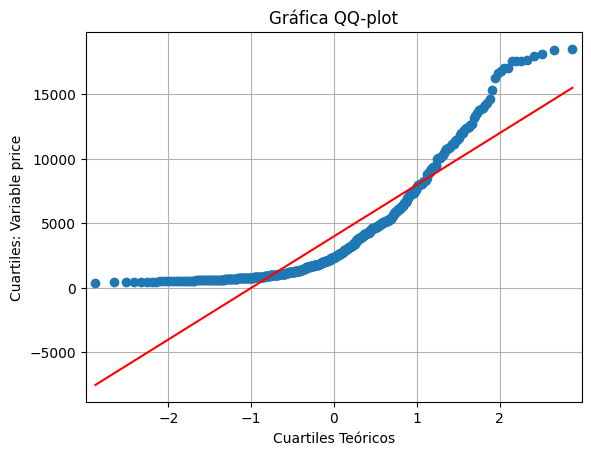

In [ ]:
figure=plt.figure(figsize=(6,5))
sm.qqplot(muestra,line='s')
plt.ylabel('Cuartiles: Variable price')
plt.xlabel('Cuartiles Teóricos')
plt.grid()
plt.title('Gráfica QQ-plot')
plt.show()

## Gráfico qq-plot

Un gráfico cuantil-cuantil, es una herramienta gráfica que se utiliza para comparar la distribución de un conjunto de datos, con una distribución teórica (en este caso, la distribución normal).

Si las distribuciones de los cuantiles comparados son idénticas, los puntos del diagrama formarán una línea recta de $45^{\circ}$. Cuanto más lejos se desvíen los puntos del diagrama de una línea recta, menos similares serán las distribuciones comparadas.


Recuerdo: Los cuantiles son puntos que dividen un conjunto de datos ordenados en partes iguales


**Ejemplo 2**

Una tienda de moda desea conocer si las calificaciones que los clientes otorgan a sus productos (Review Rating) y los montos de compra (Purchase Amount (USD)) se distribuyen normalmente. Esto le permitirá decidir qué pruebas estadísticas aplicar en próximos análisis.

Se cuenta con una base de datos de ventas y reseñas de clientes.


(base de datos 'Fashion retail sales.xlsx', la base del solemne)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Fashion_Retail_Sales.xlsx to Fashion_Retail_Sales.xlsx


In [ ]:
ventas=pd.read_excel('Fashion_Retail_Sales.xlsx')

In [ ]:
ventas['Purchase Amount (USD)'].isnull().sum()

np.int64(0)

In [ ]:
ventas=ventas.dropna()

In [ ]:
muestra1=np.random.choice(ventas['Purchase Amount (USD)'],size=300)
#Estudiaremos la normalidad de la variable Purchase Amount, la variable review rating queda de tare

1. Determinar si las variables antes mencionadas se distribuyen normal, considerando:

- Prueba de Kolmogorov-Smirnov

- Prueba de Shapiro-Wilk

  (Considerar una muestra de 300 observaciones)


**PRueba de Kolmogorov-Smirnov**

In [ ]:
# Extraer parámetros muestrales
media_K,std_K=muestra1.mean(),muestra1.std()

In [ ]:
# Estandarizar
Z_0=(muestra1-media_K)/std_K

In [ ]:
# Aplicar la Kolmogorov
ss.kstest(Z_0,'norm')
# La variable Purchase-Amount se distribuye normal ya que p_valor> 0.05

KstestResult(statistic=np.float64(0.029572193296185767), pvalue=np.float64(0.9485761148637805), statistic_location=np.float64(0.2717541611188083), statistic_sign=np.int8(1))

**Prueba de Shapiro**


In [ ]:
ss.shapiro(muestra1)

ShapiroResult(statistic=np.float64(0.9962362446352415), pvalue=np.float64(0.6978896034592657))

2. Realizar un análisis sobre cuál resulta más adecuada según las características de la muestra.

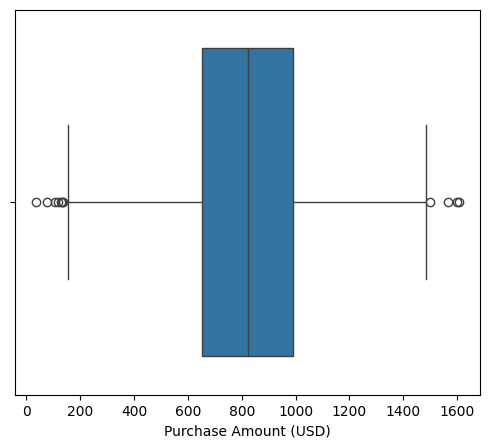

In [ ]:
figure=plt.figure(figsize=(6,5))
sns.boxplot(x=ventas['Purchase Amount (USD)'])
plt.show()

3. ¿Qué diferencias hay entre ambas pruebas en términos de sensibilidad o condiciones de uso?



4. ¿Cuál de las dos sería más adecuada para este tipo de variable y por qué?

   Si los resultados son contradictorios, ¿a cuál le darías mayor peso? Justifica